In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
movie=pd.read_csv(r'C:\Users\jaoji\Desktop\Python training\Project_practice\movies.dat', sep='::',header=None, 
                  names=['Movie_ID', 'Title', 'Genres'])

C:\Users\jaoji\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [13]:
movie.head()

,Movie_ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
Movie_ID    3883 non-null int64
Title       3883 non-null object
Genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [37]:
rating=pd.read_csv(r'C:\Users\jaoji\Desktop\Python training\Project_practice\ratings.dat', sep='::',header=None, 
                     names=['UserID','Movie_ID','Rating','Timestamp'],parse_dates=[3])

C:\Users\jaoji\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [38]:
rating.head()


,UserID,Movie_ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [40]:
rating.describe()


,UserID,Movie_ID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [42]:
user=pd.read_csv(r'C:\Users\jaoji\Desktop\Python training\Project_practice\users.dat', sep='::',header=None, 
                 names=['UserID','Gender','Age','Occupation','Zip-code'])
user.head()

C:\Users\jaoji\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [45]:
user.size

30200

Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [62]:
Master_data=rating.merge(user).merge(movie)

In [66]:
Master_data.drop(['Zip-code','Timestamp'],axis=1,inplace=True)

In [67]:
Master_data.head()

,UserID,Movie_ID,Rating,Gender,Age,Occupation,Title,Genres
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama


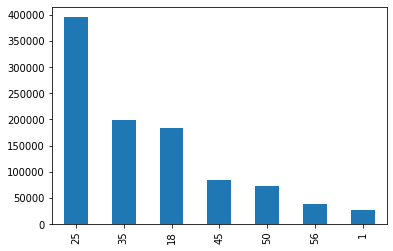

In [71]:
#1 Explore Age distribution
Master_data['Age'].value_counts().plot(kind="bar")

In [72]:
Age_group= {1: '"Under 18"', 18: '18-24', 25: '25-34', 35: '35-44', 45: '45-49',50:'50-55',56: '56+'}

In [74]:
Master_data['Age_group']=Master_data['Age'].map(Age_group)

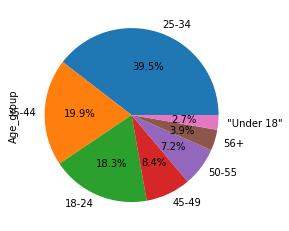

In [79]:
Master_data.Age_group.value_counts().plot(kind="pie",autopct="%0.1f%%")

# As we could see from above pie plot, majority users are in age group "25-24", then "35-44", then '18-24'

In [84]:
#User rating of the movie “Toy Story”
toystory=Master_data[Master_data['Title'].str.contains('Toy Story')==True]

In [93]:
toystory.Title.value_counts()

Toy Story (1995)      2077
Toy Story 2 (1999)    1585
Name: Title, dtype: int64

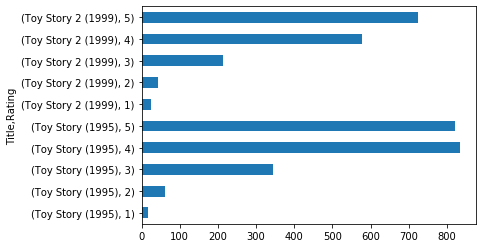

In [98]:
toystory.groupby(['Title','Rating']).size().plot(kind='barh')

# as we could see from above barplot, most of the ratings for the movies are 4 or 5, and Toy story 2 has more 5 rating than 4 rating

In [119]:
#Top 25 movies by viewership rating.
top25=Master_data.groupby(['Title'])['Rating'].mean().to_frame().nlargest(25,"Rating")

In [120]:
top25

,Rating
Title,
"Baby, The (1973)",5.000000
Bittersweet Motel (2000),5.000000
Follow the Bitch (1998),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000
Lured (1947),5.000000
One Little Indian (1973),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
Smashing Time (1967),5.000000
Song of Freedom (1936),5.000000


In [122]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
print(Master_data[Master_data['UserID']==2696])

        UserID  Movie_ID  Rating Gender  Age  Occupation  \
24345     2696      1270       2      M   25           7   
29848     2696      1097       3      M   25           7   
244232    2696      1617       4      M   25           7   
250014    2696       800       5      M   25           7   
273633    2696      3386       1      M   25           7   
277808    2696      3176       4      M   25           7   
371178    2696      1711       4      M   25           7   
377250    2696      1589       3      M   25           7   
598042    2696      1783       4      M   25           7   
603189    2696      1892       4      M   25           7   
609204    2696      1625       4      M   25           7   
611956    2696      1644       2      M   25           7   
612552    2696      1645       4      M   25           7   
613486    2696      2389       4      M   25           7   
616546    2696      1805       4      M   25           7   
618708    2696      1092       4      M 

#Feature Engineering:
            Use column genres:

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings

In [141]:
dfGenres = Master_data['Genres'].str.split("|")
dfGenres.head()

0    [Drama]
1    [Drama]
2    [Drama]
3    [Drama]
4    [Drama]
Name: Genres, dtype: object

In [142]:
listGenres = set()
for genre in dfGenres:
    listGenres = listGenres.union(set(genre))


In [143]:
listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [146]:
onehot=Master_data['Genres'].str.get_dummies('|')

In [147]:
onehot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [153]:
# 3 Determine the features affecting the ratings of any particular movie.
# 4 Develop an appropriate model to predict the movie rating

Master_data.columns

Index(['UserID', 'Movie_ID', 'Rating', 'Gender', 'Age', 'Occupation', 'Title',
       'Genres', 'Age_group'],
      dtype='object')

In [159]:
df=pd.get_dummies(Master_data,columns=['Gender','Genres','Age'])

In [165]:
df.columns


Index(['UserID', 'Movie_ID', 'Rating', 'Occupation', 'Title', 'Age_group',
       'Gender_F', 'Gender_M', 'Genres_Action', 'Genres_Action|Adventure',
       ...
       'Genres_Thriller', 'Genres_War', 'Genres_Western', 'Age_1', 'Age_18',
       'Age_25', 'Age_35', 'Age_45', 'Age_50', 'Age_56'],
      dtype='object', length=316)

In [195]:
df.drop('Age_group',axis=1,inplace=True)

In [196]:
#df.drop(['UserID','Movie_ID','Title'],axis=1, inplace=True)
df.columns

Index(['Rating', 'Occupation', 'Gender_F', 'Gender_M', 'Genres_Action',
       'Genres_Action|Adventure', 'Genres_Action|Adventure|Animation',
       'Genres_Action|Adventure|Animation|Children's|Fantasy',
       'Genres_Action|Adventure|Animation|Horror|Sci-Fi',
       'Genres_Action|Adventure|Children's',
       ...
       'Genres_Thriller', 'Genres_War', 'Genres_Western', 'Age_1', 'Age_18',
       'Age_25', 'Age_35', 'Age_45', 'Age_50', 'Age_56'],
      dtype='object', length=312)

In [197]:
X=df.iloc[ :,1:]

In [182]:
Y=df.iloc[ :,0]

In [198]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [190]:
lr=LinearRegression()

In [199]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
y_pred=lr.predict(x_test)

In [204]:
from sklearn import metrics
print(
    'r2 value: ',
    metrics.r2_score(y_test, y_pred)
)

r2 value:  0.08151426458202582


# As we could see R-squre is only 8%, not a great model, other model options could be Logsitic regression, Decision TRee , KNN, or SVM 
# are the models could be tried later